## 探索数据集

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=399x300 at 0x1825E60748>


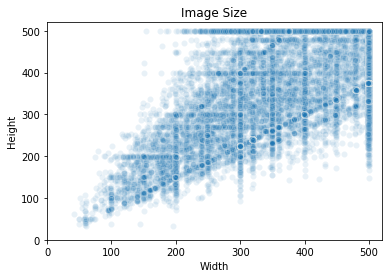

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img

# 获得当前目录
current_dir = os.getcwd()
train_dir = current_dir + '/train/'
train_files = os.listdir(train_dir) 
img_size = np.zeros((len(train_files),2))

for i in range(len(train_files)):
    img = load_img(train_dir + train_files[i])
    if i==1:
        print(img)
    img_size[i,0] = img.size[0]
    img_size[i,1] = img.size[1]

plt.scatter(img_size[:,0], img_size[:,1], alpha=0.1, edgecolors= 'white')
plt.title('Image Size')
plt.xlabel('Width') 
plt.ylabel('Height') 
plt.xlim(0,520)   
plt.ylim(0,520)  
plt.show() 

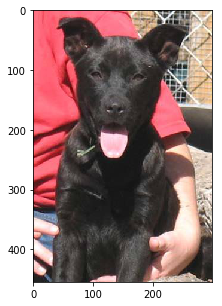

In [29]:
import cv2

random_img = np.random.choice(range(25000))
img = cv2.imread(train_dir + train_files[int(random_img)])
img = img[:, :, ::-1]
img_resize = cv2.resize(img, (128, 128))

plt.figure(figsize=(15, 5))
plt.imshow(img, cmap='gray')
plt.show()

## 预处理数据

使用创建符号链接(symbol link)的方法，将train文件夹中的12500张狗的图片和12500猫的图片分别存放在新建的`data/train/dog`和`data/train/cat`文件夹中，再将`test`文件夹，复制一份存在`data/test/`文件夹下，方法参考[手把手教你如何在Kaggle猫狗大战冲到Top2%](https://zhuanlan.zhihu.com/p/25978105)。

In [1]:
import os
import shutil
from tqdm import tqdm
# 获得当前目录
current_dir = os.getcwd()
# 创建指定目录文件夹
def rmrf_mkdir(dirname):
    if os.path.exists(dirname):
        shutil.rmtree(dirname)
    os.mkdir(dirname)
# 创建目录
rmrf_mkdir('data')

train_dir = current_dir + '/data/train'
test_dir = current_dir + '/data/test'
rmrf_mkdir(train_dir)
rmrf_mkdir(train_dir + '/dog')
rmrf_mkdir(train_dir + '/cat')
rmrf_mkdir(test_dir)

# 创建symbol link
os.symlink(current_dir + '/test/', test_dir + '/test')
train_files = os.listdir('train')
for i in tqdm(range(len(train_files))):
    file = train_files[i]
    if "dog" in file.split('.'):
        os.symlink(current_dir + '/train/' + file, train_dir + '/dog/' + file)
    else:
        os.symlink(current_dir + '/train/' + file, train_dir + '/cat/' + file)

100%|██████████| 25000/25000 [00:04<00:00, 5475.55it/s]
